The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
No file specified for image dict.
Using: /Users/adzcai/Developer/JaxHouseMaze/housemaze/image_data.pkl
IN RESET MapInit(grid=Array([[[[ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0]],

        [[ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0]],

        [[ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0]],

        [[ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0],
         [ 0]],


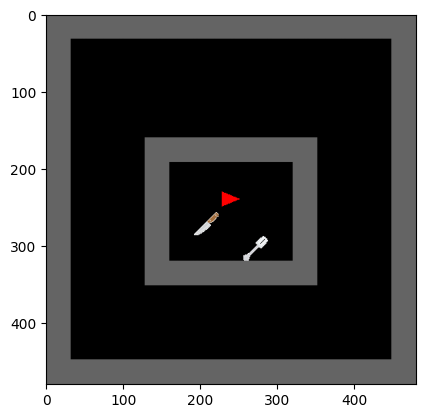

prior_timestep.state=EnvState(key=Array((), dtype=key<fry>) overlaying:
[1623140228 3545198212], step_num=Array(0, dtype=int32, weak_type=True), grid=Array([[[ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0]],

       [[ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0]],

       [[ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0]],

       [[ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0]],

       [[ 0],
        [ 0],
        [ 0],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
  

TypeError: true_fun output must have same type structure as false_fun output, but there are differences: 
    * at output.state.agent_pos, true_fun output has <class 'tuple'> and false_fun output has pytree leaf, so their Python types differ

In [6]:
# %%
%load_ext autoreload
%autoreload 2

# %%
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

from housemaze import levels
from housemaze import env as maze
from housemaze import renderer
from housemaze import utils


def render_timestep(timestep):
    image = renderer.create_image_from_grid(
        timestep.state.grid,
        timestep.state.agent_pos,
        timestep.state.agent_dir,
        image_dict,
    )
    plt.imshow(image)
    plt.show()


image_dict = utils.load_image_dict()


# %%
char_to_key = dict(
    A="knife",
    B="fork",
    C="pan",
    D="pot",
    E="bowl",
    F="plates",
)

object_to_index = {key: idx for idx, key in enumerate(image_dict["keys"])}

objects = np.array([object_to_index[v] for v in char_to_key.values()])
map1_init = utils.from_str(
    levels.two_objects, char_to_key=char_to_key, object_to_index=object_to_index
)
map2_init = utils.from_str(
    levels.three_pairs_maze1, char_to_key=char_to_key, object_to_index=object_to_index
)
grid, agent_pos, agent_dir = jax.tree.map(lambda *v: jnp.stack(v), map1_init, map2_init)
map_init = maze.MapInit(grid=grid, agent_pos=agent_pos, agent_dir=agent_dir)
env_params = maze.EnvParams(
    map_init=jax.tree.map(jnp.asarray, map_init),
    time_limit=jnp.array(50),
    objects=jnp.asarray(objects),
)
seed = 6
rng = jax.random.key(seed)

task_runner = maze.TaskRunner(task_objects=env_params.objects)
env = maze.HouseMaze(task_runner=task_runner, num_categories=len(image_dict["keys"]))
env = utils.AutoResetWrapper(env)

timestep = env.reset(rng, env_params)
render_timestep(timestep)

for _ in range(3):
    rng, key_, key_a = jax.random.split(rng, 3)
    action = jax.random.randint(key_a, (), 0, env.num_actions())
    timestep = env.step(key_, timestep, action, env_params)
    print(timestep)

In [5]:
jax.tree.map(jnp.shape, map_init)

MapInit(grid=(2, 13, 13, 1), agent_pos=((2,), (2,)), agent_dir=(2,), spawn_locs=None)